* Compile, Train and Save the models here

* 1. Preprocessing

In [26]:
import numpy as np  # linear algebra
import pandas as pd  # CSV file
import config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import davies_bouldin_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [27]:
def Scale_and_PCALDA(path):

    data = pd.read_csv(path)
    num_columns = data.shape[1]
    print(f"Num of Columns is {num_columns}")
    X = np.array(data.iloc[:,0:num_columns-1])
    y = np.array(data.iloc[:,num_columns-1])
    # print(len(X[0]))
    # print(y[0])
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # X shape: (n_samples, 12)

    ''' PCA '''
    n_components = 2
    pca_object = PCA(n_components= n_components)
    pca_object.fit(X_scaled)
    PrincipleComps = pca_object.transform(X_scaled)
    classes = np.unique(y)

    for i in range(n_components):
        plt.figure()
        for clss in classes:
            plt.hist(PrincipleComps[y == clss, i],
                    bins="auto", alpha=0.5, 
                    label=f"Class {clss}")
        plt.xlabel("Feature intervals")
        plt.ylabel("Frequency")
        plt.title(f"PCA by Class for feature column {i}")
        plt.legend()
        plt.grid(True)
        plt.show()
    score = davies_bouldin_score(PrincipleComps, y)
    print(f"The davies_bouldin_score for PCA is {score}")


    """ LDA """

    lda_mcc = LDA()
    lda_mcc.fit(X_scaled,y)
    lda_OP = lda_mcc.transform(X_scaled)
    plt.figure()
    for c in classes:
        plt.hist(lda_OP[y == c], bins=20, alpha=0.5, label=f"Class {c}")
    plt.xlabel("1D LDA Projection")
    plt.ylabel("Frequency")
    plt.title("LDA Projection onto First Component. 0 is cat, 1 is Dog")
    plt.legend()
    plt.grid(True)
    plt.show()

Original DATA
Num of Columns is 13


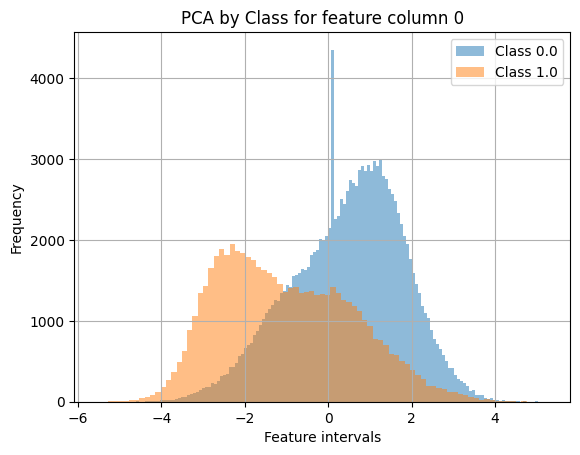

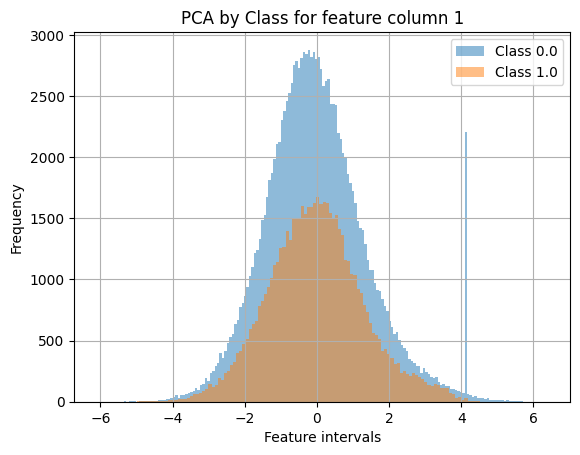

The davies_bouldin_score for PCA is 2.4210080452769374


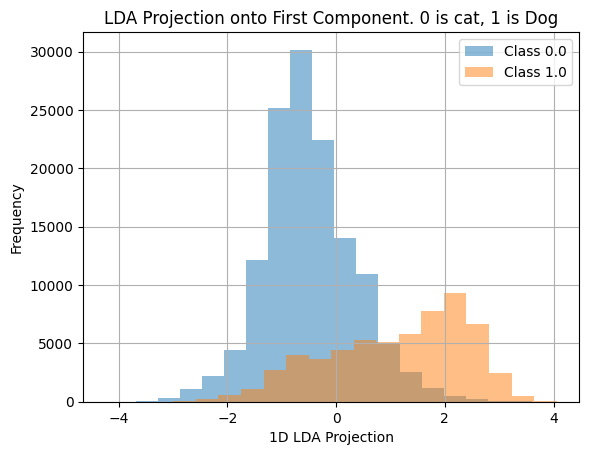

fs300_cc12
Num of Columns is 13


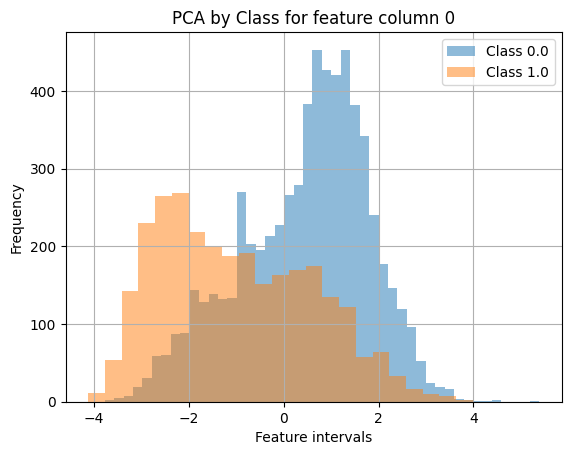

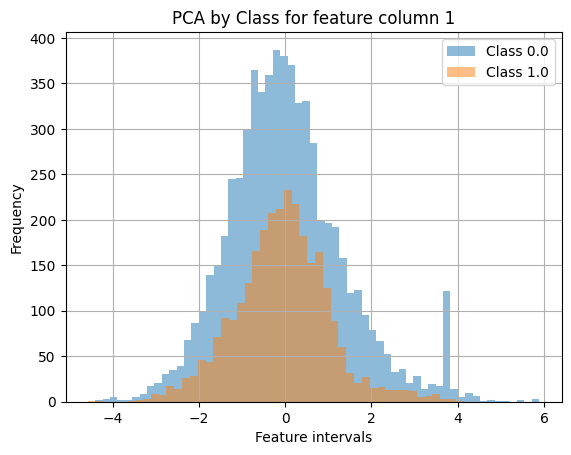

The davies_bouldin_score for PCA is 2.352105520991345


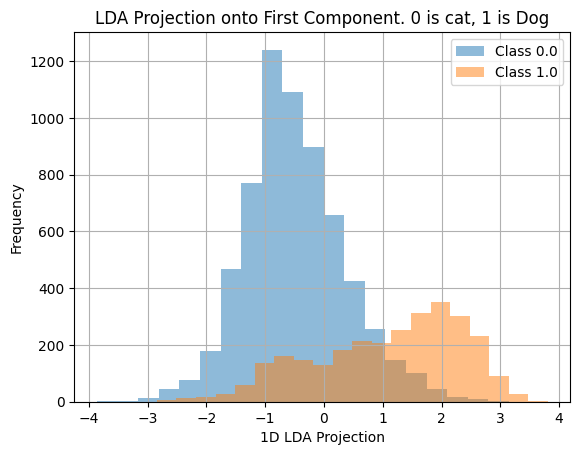

fs300_cc20
Num of Columns is 21


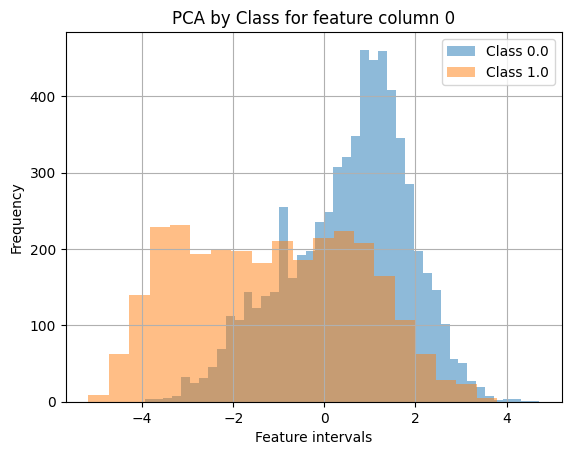

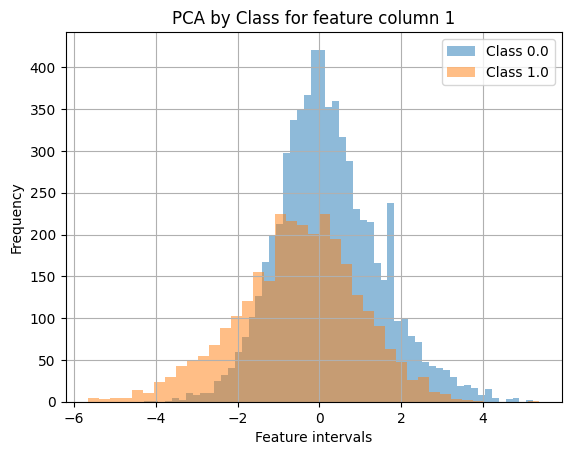

The davies_bouldin_score for PCA is 2.074218457896792


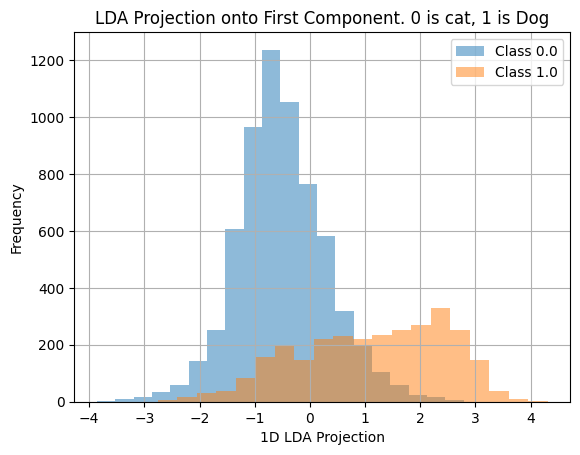

fs300_cc30
Num of Columns is 31


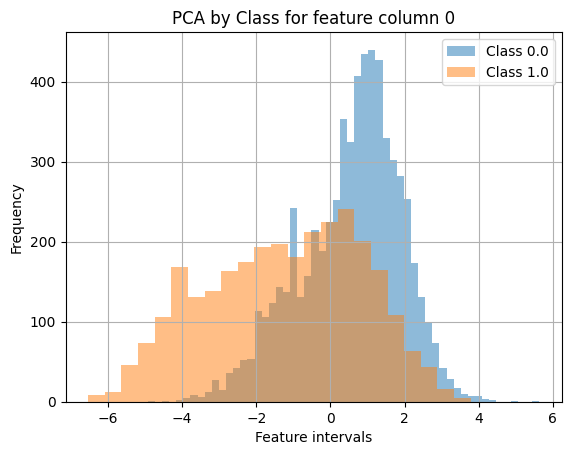

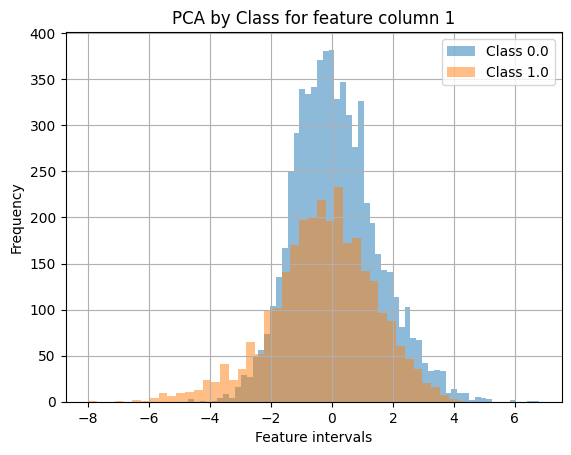

The davies_bouldin_score for PCA is 2.240011271309776


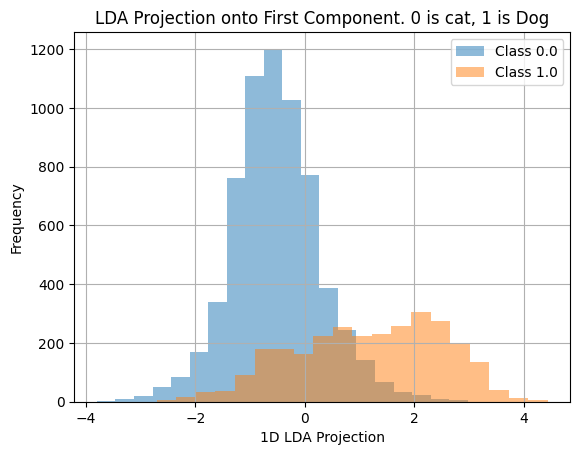

fs500_cc20
Num of Columns is 21


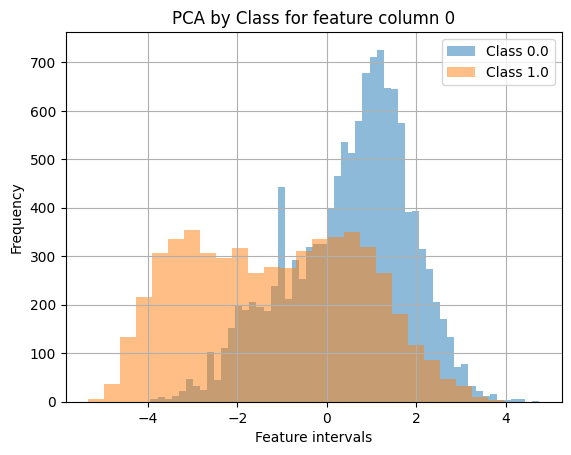

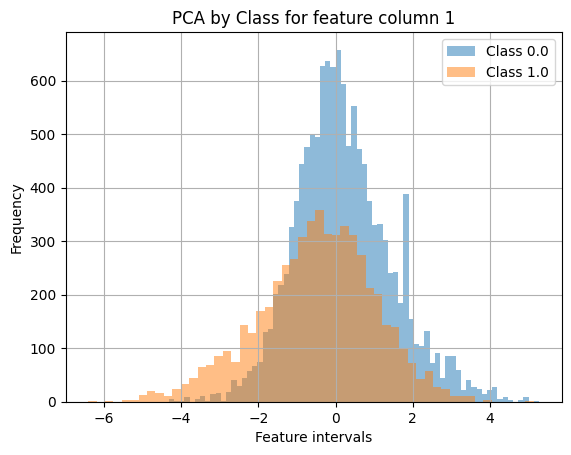

The davies_bouldin_score for PCA is 2.1137792453760924


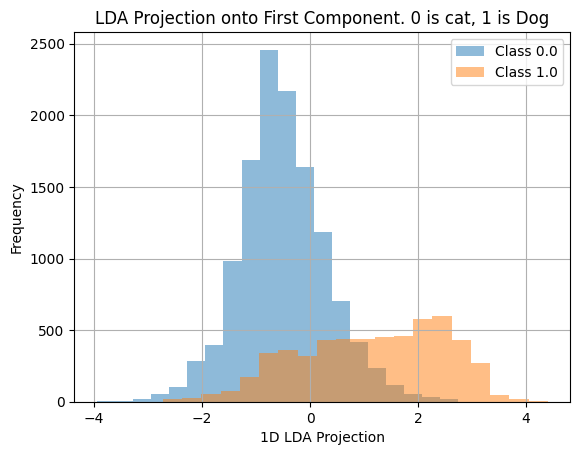

In [28]:

print("Original DATA")
Scale_and_PCALDA(path = config.Features + 'data.csv' )

print("fs300_cc12")
Scale_and_PCALDA(path = config.Features + 'data_fs300_cc12.csv')

print("fs300_cc20")
Scale_and_PCALDA(path = config.Features + 'data_fs300_cc20.csv')

print("fs300_cc30")
Scale_and_PCALDA(path = config.Features + 'data_fs300_cc30.csv')

print("fs500_cc20")
Scale_and_PCALDA(path = config.Features + 'data_fs500_cc20.csv')

* 2. Training the model

* First approach- Vanilla NN 
* fs300_cc20 looks good. Let us see....................

In [29]:
data = pd.read_csv(config.Features + 'data_fs300_cc20.csv')
num_columns = data.shape[1]
X = np.array(data.iloc[:,0:num_columns-1])
y = np.array(data.iloc[:,num_columns-1])
# print(len(X[0]))
# print(y[0])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,        
    stratify=y,           
    random_state=42        
)



In [30]:

model = Sequential([
    Dense(64, input_shape=(20,), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)


Epoch 1/50


c:\Users\heuer\Documents\GitHub\Cat-vs-Dog-Voice-recognition\lab-env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6556 - loss: 0.6747 - val_accuracy: 0.8345 - val_loss: 0.4076
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8102 - loss: 0.4498 - val_accuracy: 0.8472 - val_loss: 0.3726
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8359 - loss: 0.4102 - val_accuracy: 0.8606 - val_loss: 0.3520
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8412 - loss: 0.3956 - val_accuracy: 0.8646 - val_loss: 0.3445
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8525 - loss: 0.3795 - val_accuracy: 0.8740 - val_loss: 0.3334
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8482 - loss: 0.3740 - val_accuracy: 0.8733 - val_loss: 0.3307
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8555 - loss: 0.3598 - val_accuracy: 0.8800 - val_loss: 0.3221
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8709 - loss: 0.3330 - val_accuracy: 0.8787 - val_

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8991 - loss: 0.2502
Test Accuracy: 0.90


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0.01567843]
 [0.3175798 ]
 [0.10297453]
 ...
 [0.01549307]
 [0.01137193]
 [0.01078845]]
[0. 1. 0. ... 0. 0. 0.]


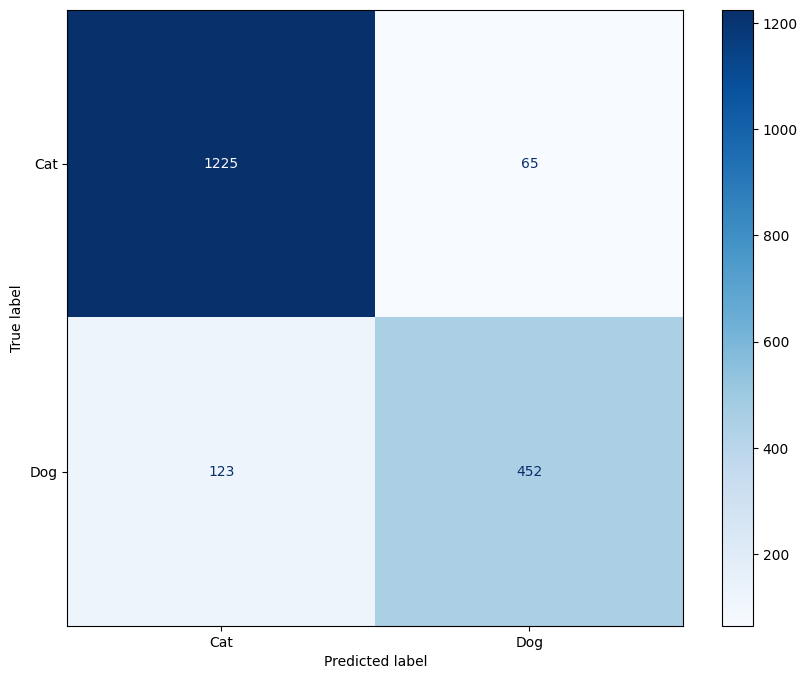

In [32]:
#Confusion Matrix
predictions = model.predict(X_test)
print(predictions) #why are predictions between zero and 1?? Shouldnt this be binary??
print(y_test)
# Generate confusion matrix
cm = confusion_matrix(y_test, np.round(predictions))
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap=plt.cm.Blues)
plt.gcf().set_size_inches(10, 8)
plt.show()

* Second approach- Vanilla NN and fs500_cc20 dataset

In [33]:
data = pd.read_csv(config.Features + 'data_fs500_cc20.csv')
num_columns = data.shape[1]
X = np.array(data.iloc[:,0:num_columns-1])
y = np.array(data.iloc[:,num_columns-1])
# print(len(X[0]))
# print(y[0])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,         
    stratify=y,            
    random_state=42       
)

In [34]:

# Define the model
model = Sequential([
    Dense(64, input_shape=(20,), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=80,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/80


c:\Users\heuer\Documents\GitHub\Cat-vs-Dog-Voice-recognition\lab-env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


362/362 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7081 - loss: 0.6298 - val_accuracy: 0.8528 - val_loss: 0.3669
Epoch 2/80
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8342 - loss: 0.4116 - val_accuracy: 0.8622 - val_loss: 0.3437
Epoch 3/80
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8463 - loss: 0.3881 - val_accuracy: 0.8684 - val_loss: 0.3295
Epoch 4/80
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8576 - loss: 0.3584 - val_accuracy: 0.8729 - val_loss: 0.3118
Epoch 5/80
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8654 - loss: 0.3491 - val_accuracy: 0.8819 - val_loss: 0.2973
Epoch 6/80
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8746 - loss: 0.3241 - val_accuracy: 0.8891 - val_loss: 0.2850
Epoch 7/80
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8717 - loss: 0.3342 - val_accuracy: 0.8905 - val_loss: 0.2803
Epoch 8/80
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8736 - loss: 0.3092 - val_accuracy: 0.8926 - val_

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9222 - loss: 0.2102
Test Accuracy: 0.92


114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


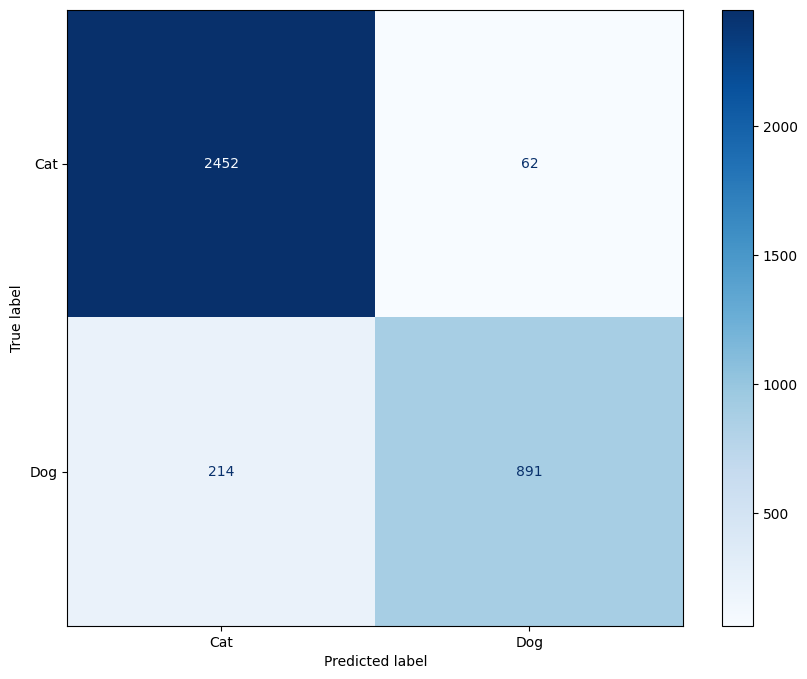

In [36]:
#Confusion Matrix
predictions = model.predict(X_test)
# Generate confusion matrix
cm = confusion_matrix(y_test, np.round(predictions))
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap=plt.cm.Blues)
plt.gcf().set_size_inches(10, 8)
plt.show()

* Approach 3 - 1D convolutional model and fs300cc12 dataset

In [37]:
data = pd.read_csv(config.Features + 'data_fs300_cc20.csv')
num_columns = data.shape[1]
X = np.array(data.iloc[:,0:num_columns-1])
y = np.array(data.iloc[:,num_columns-1])
# print(len(X[0]))
# print(y[0])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,         
    stratify=y,            
    random_state=42        
)

In [38]:
# Define input shape
num_mfcc = 20
num_frames = 50  # adjust depending on your data
input_shape = (num_frames, num_mfcc)

model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


c:\Users\heuer\Documents\GitHub\Cat-vs-Dog-Voice-recognition\lab-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 48, 32)         │         1,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 48, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 24, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 24, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 22, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 22, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 704)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,729 (209.88 KB)

 Trainable params: 53,537 (209.13 KB)

 Non-trainable params: 192 (768.00 B)

In [39]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)


Epoch 1/30


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 20), dtype=float32). Expected shape (None, 50, 20), but input has incompatible shape (None, 20)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 20), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


In [ ]:
#Confusion Matrix
predictions = model.predict(X_test)
# Generate confusion matrix
cm = confusion_matrix(y_test, np.round(predictions))
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap=plt.cm.Blues)
plt.gcf().set_size_inches(10, 8)
plt.show()